# Статистика
Теперь мы приступаем к пятой главе книги и для меня она является очень интересной, на втором месте после главы про теорию вероятности. Сегодня нам предстоит реализовать несколько статистических инструментов. Также начиная с этой главы мы будем использовать наши наработки из прошлых глав.
Импортируем файл с функциями линейной алгебры.

In [1]:
!wget https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py

--2024-01-04 22:46:39--  https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5566 (5.4K) [text/plain]
Saving to: ‘linear_algebra.py’

linear_algebra.py   100%[===================>]   5.44K  --.-KB/s    in 0s      

2024-01-04 22:46:39 (26.1 MB/s) - ‘linear_algebra.py’ saved [5566/5566]



Приступим к изучению инструментов статистики. В книге вы можете прочитать полные пояснения к методам.

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
# from linear_algebra import *

Text(0, 0.5, '# of people')

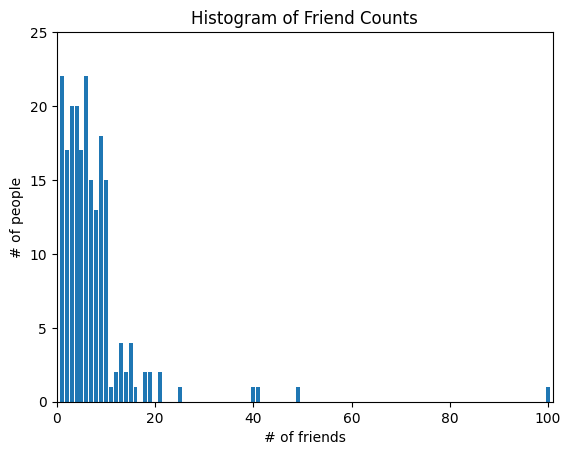

In [3]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

In [4]:
num_points = len(num_friends)

Максимум и минимум

In [5]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
largest_value, smallest_value

(100.0, 1)

Отсортируем выборку и посчитаем следующий максимум и минимум

In [6]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
smallest_value, second_smallest_value, second_largest_value


(1, 1, 49)

Введем понятие среднего выборки

In [26]:
from typing import List
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [8]:
mean(num_friends)

7.333333333333333

Теперь вспомним определение медианы

In [9]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

In [10]:
def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [11]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [12]:
assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

Медианой можно называть 50-ый перцентиль. Создадим функцию для неопределенного перцентиля.


In [13]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

В статистике есть понятие моды. Это лидеры по повторениям в выборке

In [14]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

Размах выборки - разность между максимумом и минимумом.

In [15]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

Вариация (как приблизительно среднеквадратичное отклонение от среднего) определяется формулой
$\frac{Σ_{i=0}^{n}\left(x_i-\bar{x} \right)^{2}}{n-1}$

Для суммы квадратов используем функцию из предыдущего модуля

In [16]:
from linear_algebra import sum_of_squares


def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]


def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

Среднеквадратичное отклонение или стандартное отклонение выборки - это корень из вариации

In [17]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

Хорошим и устойчивым к выбросам инструментом будет интерквантильный размах между 25-ым и 75-ым перцентилями

In [18]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

Теперь перейдем к анализу двух связанных выборок.
Ковариация измеряет отклонение двух переменных в тандеме от своих средних:

In [19]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [21]:
from linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)


Всем известная корреляция - более удобная характеристика выборок, в нужных единицах. Представляет из себя ковариацию разделенную на стандартные отклонения выборок.
Варьируется от -1 до 1, где -1 - знак противоположного направления роста, 0 - отсутствие линейной зависимости и 1 - наличие прямой линейной зависимости.

In [22]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero


In [23]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [24]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

# Задание
Вам будет дана выборка данных. Ваша задача произвести очистку выборки - удалить все данные лежащие выше 98го перцентиля и ниже 2-го. Потом посчитайте среднее получившейся выборки и её стандартное отклонение.
 Cреднее и стд возвращайте в кортеже в return вашей функции clear_that.

In [ ]:
from typing import List, Tuple
def clear_that(sample:List[float])->Tuple[List[float], float, float]:
  # Ваш код

In [34]:
# @title TrendOn solution
from typing import List, Tuple
def clear_that(sample:List[float])->Tuple[float, float]:
  low = int(0.02*len(sample))
  high = int(0.98*len(sample))
  cleared_sample = sample[low:high+1]
  _mean = mean(cleared_sample)
  _std = standard_deviation(cleared_sample)
  return _mean, _std

Самопроверка

In [35]:
arr = [0.09649500216722826,
 1.067719810780088,
 -0.0909493249583295,
 1.51387229418062,
 0.668894327489708,
 -0.8290714873887567,
 -0.5046454914377212,
 0.6502876304103224,
 0.45031014531850616,
 -2.1658860791747347,
 0.2571315131450308,
 -0.9389931830270694,
 -0.08715698737774415,
 1.4948036655385537,
 -0.4567806766654905,
 -0.9925346916855489,
 1.1390443939883985,
 0.31120940273680675,
 0.8823380644537197,
 -1.0571869218916827,
 0.2637988781889936,
 -0.1270045697374429,
 0.6487248733554851,
 -1.7148279572662564,
 0.12657613035136706,
 -0.9631925775206397,
 0.20325035333141053,
 0.9119807546822384,
 0.23156422723449588,
 1.0807748888254463,
 0.04916680741604905,
 0.19370940124019664,
 -0.4056778497732385,
 0.360568029199637,
 0.19602771953427098,
 -0.419897927011502,
 1.0219032515476056,
 0.18705086844473656,
 -1.898725774433424,
 0.7085211827286247,
 -0.03349853902899481,
 0.0390810916039688,
 0.351347353806727,
 -0.6116396901365189,
 0.07630568813636147,
 -0.7372715942388384,
 -0.28689563941499113,
 0.13460192993970815,
 0.9767900712088354,
 -1.6850524651207113,
 -0.3194480069646753,
 -1.0883693918989041,
 1.1665228205641198,
 0.41579582614449506,
 -0.7708896611108457,
 -0.2640632400177076,
 1.5638074495397225,
 0.4522250933376165,
 0.49858941897283554,
 0.6604111547542519,
 1.8145187148982314,
 0.6929900379829026,
 0.3587818500815029,
 -0.49613464184557765,
 -0.18952602292484771,
 0.6770919875636662,
 -0.09585141739672594,
 -0.5243867433402161,
 1.1220109171963333,
 -0.27649011047348254,
 0.4748934578557452,
 -0.1637584997795767,
 0.9687055817197827,
 -0.496237070652197,
 0.8787330177014483,
 0.9333015466341794,
 0.3285352658990742,
 -0.07819791814317051,
 1.2003053614888313,
 1.7620870439976224,
 1.5437994062647382,
 -0.4333738332216668,
 1.6561888636140676,
 0.3842659661895033,
 -1.6844698031686647,
 0.4892718604844119,
 -0.13804140985788874,
 -1.3765916649339411,
 1.4572463116020682,
 -0.07926611705187503,
 -1.4145107284518301,
 -0.4860337803667871,
 -0.7305962530851616,
 1.314805739583678,
 -1.90418657593995,
 0.5913071448888133,
 -0.4878910661417488,
 -1.4250753211010265,
 0.686658353085256,
 1.1644932789852769]

In [37]:
ans = clear_that(arr)
assert 0.0854866641743<ans[0]<0.0854866641746
assert 0.899969690418<ans[1]<0.899969690421